# HW 8: Unsupervised Learning

The goal of this homework is to identify personalized marketing strategy based on customer data. An important step to achieve this is to conduct customer segmentation via customer behavior measures pertaining to credit card expenditures and payments. 

The data for this homework is uploaded on CANVAS (data.csv) and includes usage behavior of approximately 9000 active credit card holders during the span of 6 months. Each row of the data corresponds to a customer and the columns include the following information:
1. CUST ID: Identification of Credit Card holder
2. BALANCE: Balance amount left in their account to make purchases
3. BALANCE FREQUENCY: How frequently the Balance is updated
4. PURCHASES: Amount of purchases made from account
5. ONEOFF PURCHASES: Maximum purchase amount done in one-go (i.e., in a single attempt)
6. INSTALLMENTS PURCHASES: Amount of purchase done in installment
7. CASH ADVANCE : Cash in advance given by the user
8. PURCHASES FREQUENCY: Frequency of purchases
9. ONEOFFPURCHASESFREQUENCY : Frequently of purchases happening in one-go
10. PURCHASESINSTALLMENTSFREQUENCY : Frequency of purchases happening in installments
11. CASHADVANCEFREQUENCY : Frequency of cash being paid in advance
12. CASHADVANCETRX : Number of transactions made with "Cash in Advanced"
13. PURCHASES TRX : Number of purchase transactions being made
14. CREDIT LIMIT : Credit card limit for the user
15. PAYMENTS: Amount of payment made by the user
16. MINIMUM PAYMENTS: Minimum amount of payments made by the user
17. PRCFULLPAYMENT: Percent of full payment made by the user
18. TENURE: Tenure of credit card service for the user

## (a) Data exploration 
Plot the histograms of variables 2-18 in the data (i.e., 17 histograms total). Provide a brief discussion on your intuition regarding the variables and the resulting histograms.

In [23]:
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture

In [2]:
# read csv file 
data = []
data_path = "data.csv"

with open(data_path, 'r', encoding='utf-8-sig') as f:
    csv_file = csv.reader(f)
    data = [row for row in csv_file]

In [3]:
df = pd.DataFrame(data)
new_header = df.iloc[0] # grab the first row for the header
df = df[1:] # take the data less the header row
df.columns = new_header
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,C10001,40.900749,0.818182,95.4,0,95.4,0,0.166667,0,0.083333,0,0,2,1000,201.802084,139.509787,0,12
2,C10002,3202.467416,0.909091,0,0,0,6442.945483,0,0,0,0.25,4,0,7000,4103.032597,1072.340217,0.222222,12
3,C10003,2495.148862,1,773.17,773.17,0,0,1,1,0,0,0,12,7500,622.066742,627.284787,0,12
4,C10004,1666.670542,0.636364,1499,1499,0,205.788017,0.083333,0.083333,0,0.083333,1,1,7500,0,,0,12
5,C10005,817.714335,1,16,16,0,0,0.083333,0.083333,0,0,0,1,1200,678.334763,244.791237,0,12


In [4]:
# convert data types for the features 
features = df.columns[1:]
features = df[features].apply(pd.to_numeric, errors='coerce')
features.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
2,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
3,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
5,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# replace missing values with column means
features.fillna(features.mean(numeric_only=True), inplace=True)

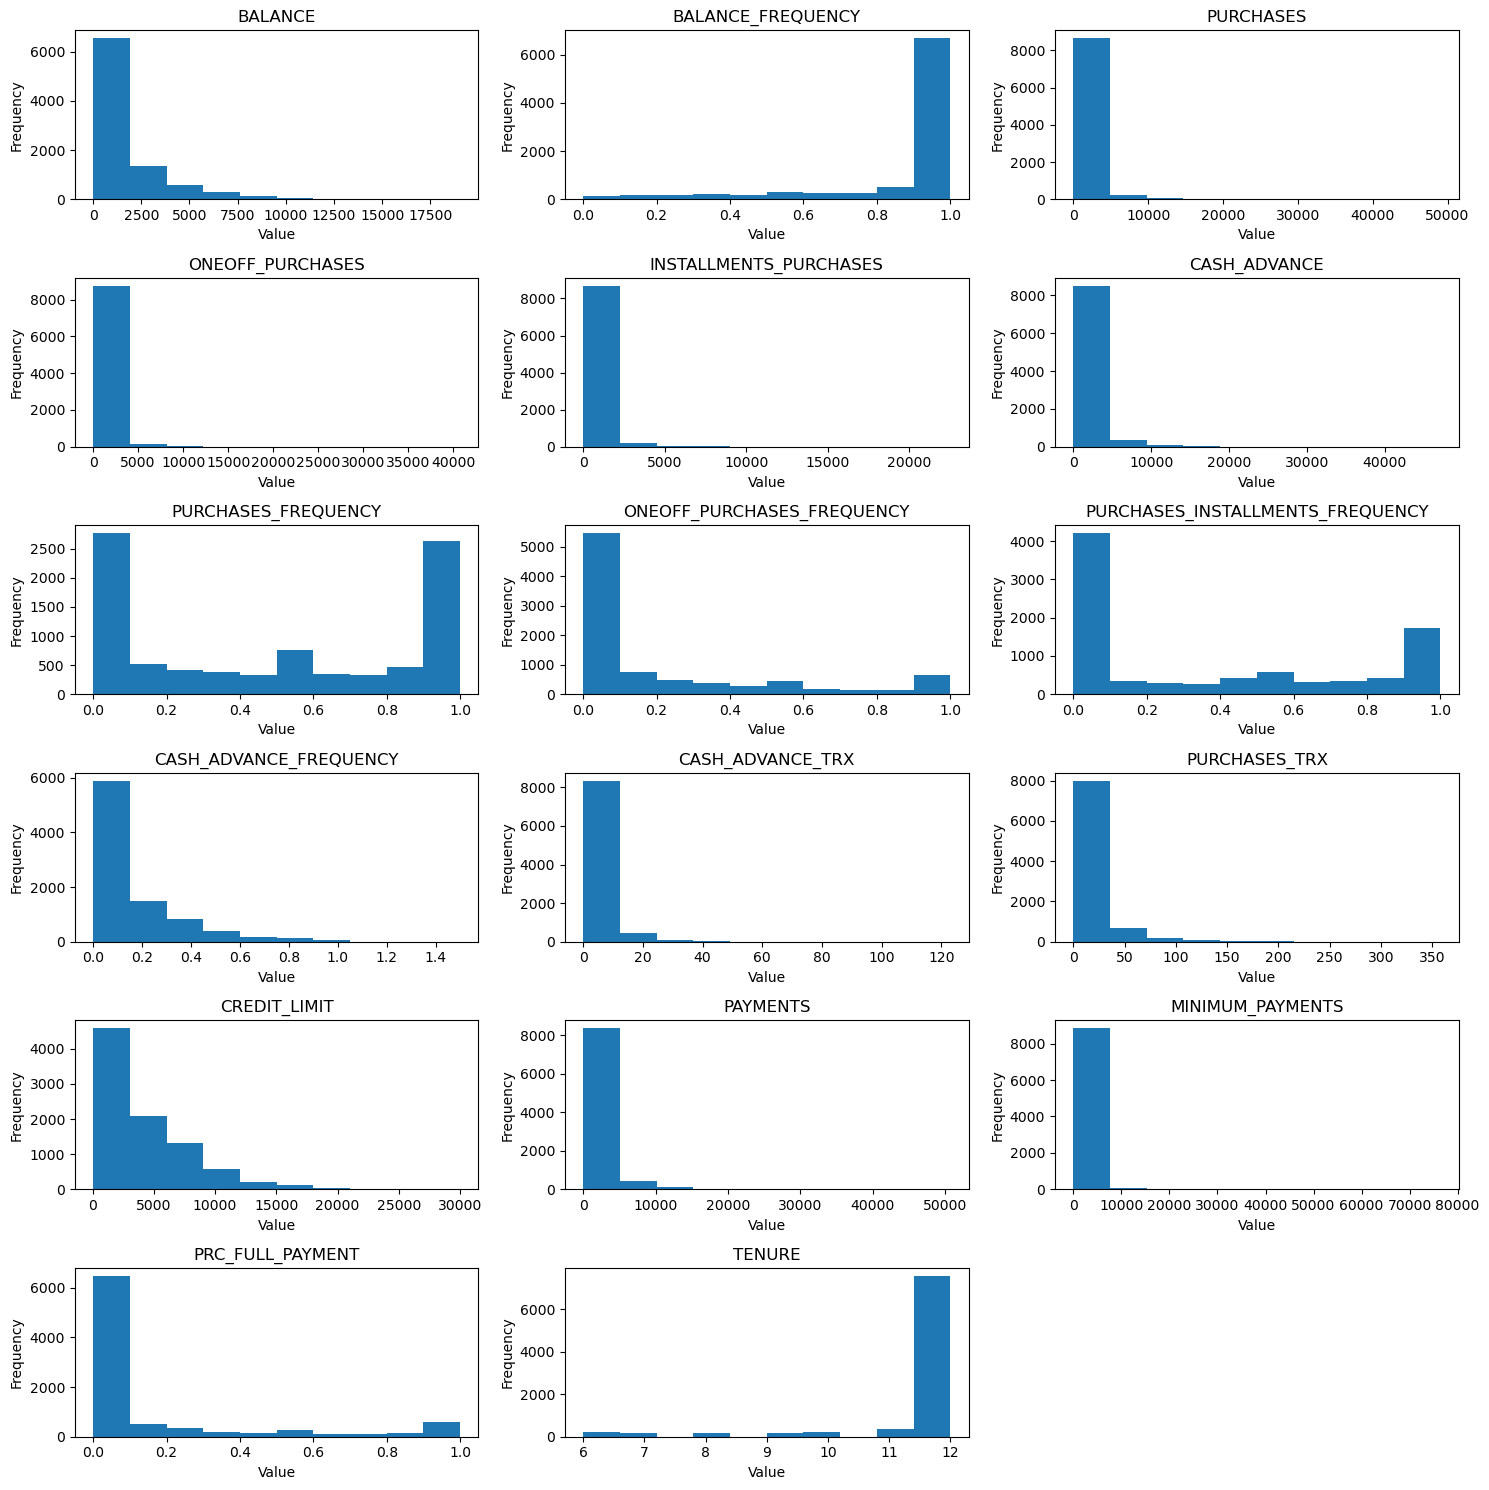

In [6]:
n_rows, n_cols = 6, 3  # 6 rows and 3 columns
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    if i < len(features.columns):
        ax.hist(features.iloc[:, i], bins=10)
        ax.set_title(f"{features.columns[i]}")
        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

**Discussions**: Most of the users have the balance amount of less than 10,000 and make purchases/payments of less than 5,000. Users either purchasing in high (0.9-1) or low (0-0.1) frequency accounted for the majority. Most of the users did not pay the bills in full. Most users (>6,000) only paid 10% of the bills. Also, most of the users have the tenures of credit card for 12 years. These foundings matched with my intuition. Most of the users are general public thus the balance and amount of payments below 5,000 dollars are of high frequency. However, the histograms suggest that most customers did not pay the bill in full and would rather pay in installments.  

## (b) Data exploration
Compute the Pearson's correlation between all pairs of variables 2-18 (i.e., all variables except from the customer ID). Assign the resulting correlation values in a 17 x 17 matrix C, whose (i; j) element represents the correlation value between variables i and j, i.e., C(i; j) = corr(i; j). Visualize the resulting matrix C with a heatmap and discuss potential associations between the considered variables.
Note: You can use the `heatmap` function from `seaborn`.

In [7]:
# assume data is a pandas DataFrame with 17 variables
variables = list(range(0, 17))  # variables 2-18

# compute correlation matrix
corr_matrix = features.iloc[:, variables].corr()
corr_matrix

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,,,,,,,,,,,,,,,,,
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275


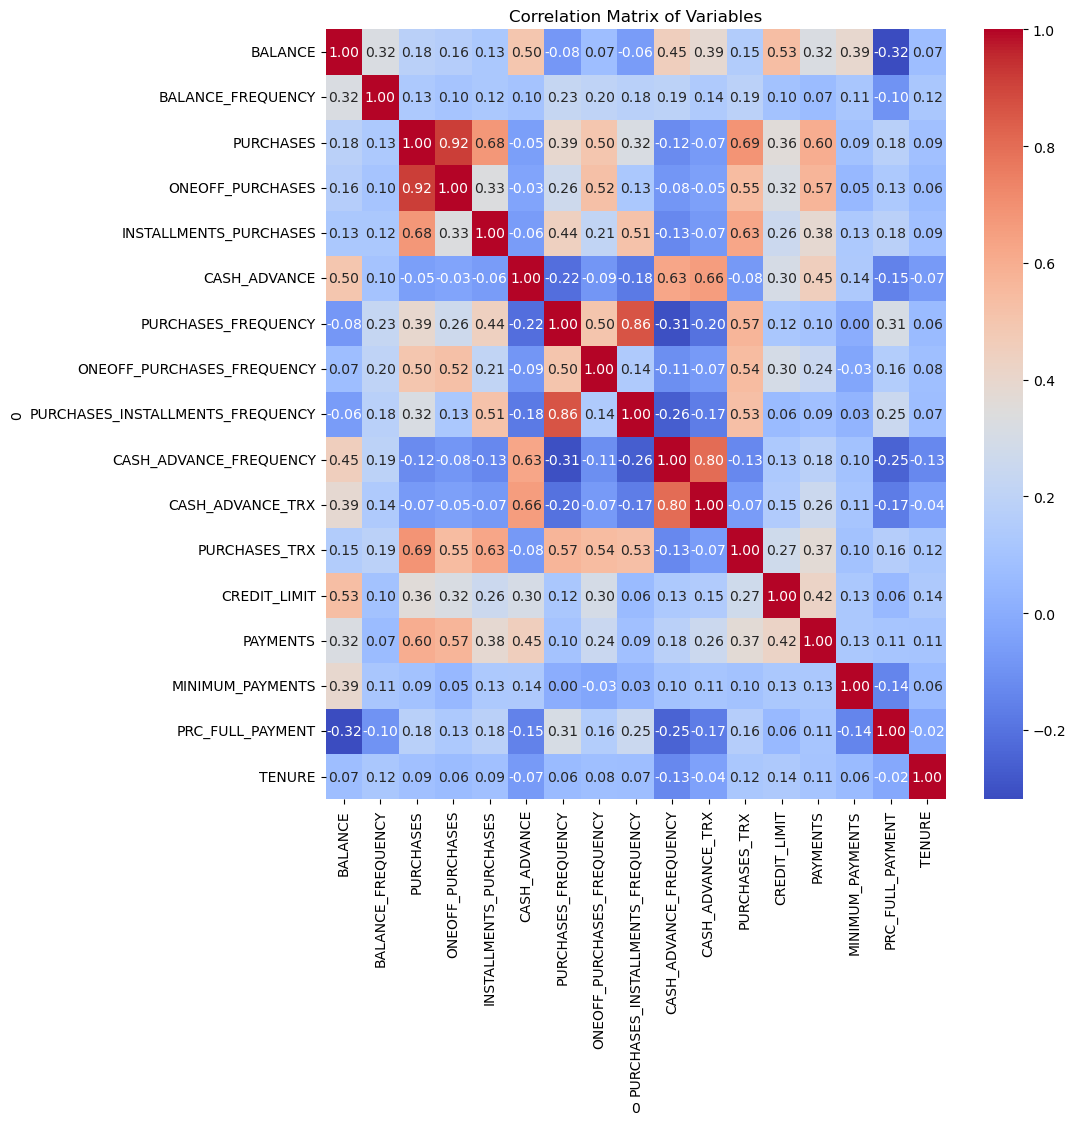

In [8]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", ax=ax)
plt.title("Correlation Matrix of Variables")
plt.show()

**Discussions**: One-off purchases and purchases have the highest correlation coefficient (0.92), followed by purchases_frequency and purchases_installments_frequency (0.86) and cash_advance_frequency and cash_advance_trx (0.80). The results suggest that users who purchased more would also have higher one-off purchase amount. Also, purchase frequency is highly correlated with frequency of purchases happening in one-go. Frequency of cash being paid in advance is also associated with Number of transactions made with "Cash in Advanced." 

## (c) K-Means Clustering
Use the K-Means clustering algorithm to cluster participants based on variables 2-16. Experiment with different number of clusters K and use the elbow method to identify the optimal number of clusters K* based on the data. Using K*, report the number of users that were assigned to each cluster, the centroid of each cluster (i.e., average value of each feature per cluster), and the scatter of each cluster (i.e., average distance of each sample of the cluster to the cluster centroid). Discuss your findings in association to users' percent of full payment (variable 17) and tenure of credit card service (variable 18).
Note: You can use the sklearn.cluster.KMeans function. Consider feature normalization to avoid artificially assigning higher importance to features of larger range.

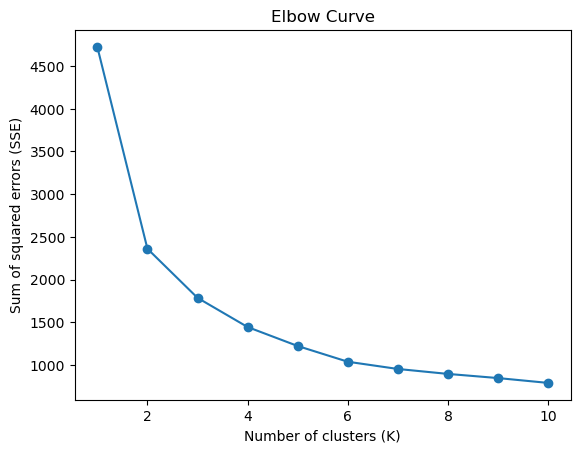

In [9]:
# assume data is a pandas DataFrame with 18 variables
variables = list(range(0, 15))  # variables 2-16

# create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler to the data and transform the data
normalized_data = scaler.fit_transform(features.iloc[:, variables])

# initialize list to store sum of squared distances for each value of K
sse = []

# experiment with different number of clusters K using the elbow method
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)

# plot the elbow curve
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Curve')
plt.show() 

In [10]:
# set the optimal number of clusters based on the elbow method
K_star = 6  

# perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters = K_star, random_state = 0)
kmeans.fit(normalized_data)

# assign participants to clusters and compute cluster metrics
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
scatter = np.zeros(K_star)
n_users = np.zeros(K_star)

for k in range(K_star):
    idx = (labels == k)
    n_users[k] = np.sum(idx)
    scatter[k] = np.mean(np.linalg.norm(normalized_data[idx, :] - centroids[k, :], axis=1))

    print(f"Cluster {k+1}:")
    print(f"Number of users: {n_users[k]}")
    print(f"Centroid: {centroids[k]}")
    print(f"Scatter: {scatter[k]:.2f}\n")

Cluster 1:
Number of users: 1900.0
Centroid: [0.05818384 0.93858883 0.02192534 0.00532066 0.03817677 0.01095138
 0.95577399 0.07761363 0.91691464 0.04481611 0.01298674 0.06265069
 0.12333586 0.02704025 0.01305191]
Scatter: 0.28

Cluster 2:
Number of users: 3044.0
Centroid: [1.17863530e-01 9.68822244e-01 3.92157119e-03 4.30424048e-03
 7.53460797e-04 3.64234655e-02 7.60270792e-02 5.90033344e-02
 1.65726383e-02 1.62626936e-01 4.68815102e-02 4.18994413e-03
 1.38560667e-01 2.98252714e-02 1.37956125e-02]
Scatter: 0.26

Cluster 3:
Number of users: 1036.0
Centroid: [0.00900338 0.34714554 0.00622094 0.00597356 0.00273998 0.01220313
 0.1494416  0.07321109 0.07197414 0.03742068 0.00994287 0.00691583
 0.12653267 0.0280118  0.00391411]
Scatter: 0.29

Cluster 4:
Number of users: 837.0
Centroid: [0.0800487  0.96004113 0.03516539 0.03975125 0.00464559 0.0123324
 0.75422064 0.72570494 0.09450893 0.06400575 0.01729949 0.05593934
 0.17885234 0.03813727 0.00843872]
Scatter: 0.39

Cluster 5:
Number of user

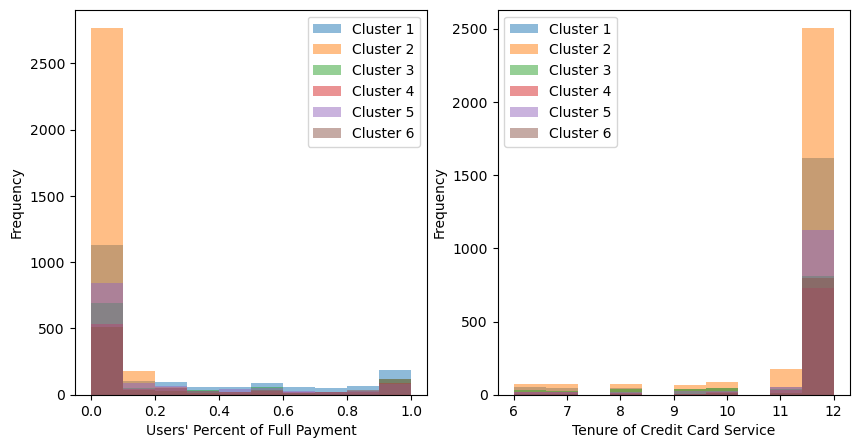

In [11]:
# examine the distribution of users' percent of full payment (variable 17) and tenure of credit card service (variable 18)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for k in range(K_star):
    idx = (labels == k)
    plt.hist(features.loc[idx, "PRC_FULL_PAYMENT"], alpha=0.5, label=f"Cluster {k+1}")
plt.xlabel("Users' Percent of Full Payment")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
for k in range(K_star):
    idx = (labels == k)
    plt.hist(features.loc[idx, "TENURE"], alpha=0.5, label=f"Cluster {k+1}")
plt.xlabel("Tenure of Credit Card Service")
plt.ylabel("Frequency")
plt.legend()

plt.show()

**Discussions**: Cluster 2 has the highest frequency for 0-10% of users' percent of full payment and all tenures of credit card service while Cluster 4 shows the opposite behavior (the lowest frequency for both variables). The plots show that different clusters have different centroids and means so these clusters can be easily differentiated from the plots. Cluster 2 has the most data points while Cluster 4 has the least. 

## (d) K-Means Clustering
Repeat question (c) using a different combination of features at the input of K-Means, informed by your findings in questions (a) and (b). Please discuss your findings.
Note: Consider removing highly skewed features and/or keeping features that are not correlated with each other.

Combination 1: PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CREDIT LIMIT, PRC_FULL_PAYMENT, TENURE

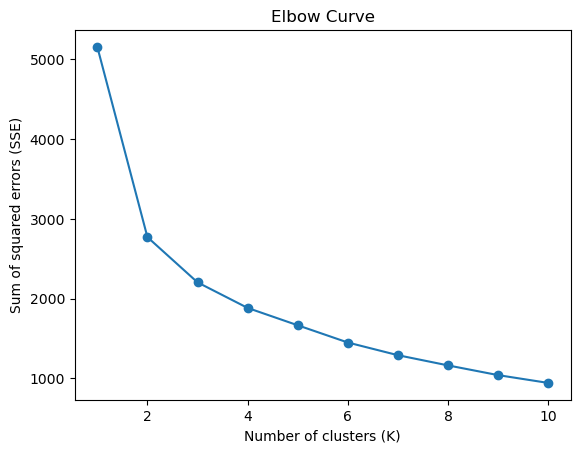

In [12]:
variables = [6,7,8,9,12,15,16]

# create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler to the data and transform the data
normalized_data = scaler.fit_transform(features.iloc[:, variables])

# initialize list to store sum of squared distances for each value of K
sse = []

# experiment with different number of clusters K using the elbow method
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)

# plot the elbow curve
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Curve')
plt.show() 

In [13]:
# set the optimal number of clusters based on the elbow method
K_star = 8  

# perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters = K_star, random_state = 0)
kmeans.fit(normalized_data)

# assign participants to clusters and compute cluster metrics
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
scatter = np.zeros(K_star)
n_users = np.zeros(K_star)

for k in range(K_star):
    idx = (labels == k)
    n_users[k] = np.sum(idx)
    scatter[k] = np.mean(np.linalg.norm(normalized_data[idx, :] - centroids[k, :], axis=1))

    print(f"Cluster {k+1}:")
    print(f"Number of users: {n_users[k]}")
    print(f"Centroid: {centroids[k]}")
    print(f"Scatter: {scatter[k]:.2f}\n")

Cluster 1:
Number of users: 3402.0
Centroid: [0.07622684 0.05815356 0.01731303 0.13293176 0.13928647 0.04365102
 0.97783324]
Scatter: 0.24

Cluster 2:
Number of users: 685.0
Centroid: [0.96446374 0.744531   0.83471164 0.08168086 0.24392966 0.07153249
 0.96836983]
Scatter: 0.37

Cluster 3:
Number of users: 696.0
Centroid: [0.80659506 0.05745025 0.74690067 0.00333348 0.12692157 0.83265657
 0.87739464]
Scatter: 0.46

Cluster 4:
Number of users: 1141.0
Centroid: [0.5136439  0.10567115 0.41836458 0.05835518 0.14125943 0.08398224
 0.97821637]
Scatter: 0.31

Cluster 5:
Number of users: 363.0
Centroid: [0.9032724  0.84662747 0.47287131 0.01620474 0.24479249 0.88176884
 0.96648301]
Scatter: 0.52

Cluster 6:
Number of users: 483.0
Centroid: [0.16396363 0.10303081 0.05661541 0.18086363 0.10299967 0.05931759
 0.23188406]
Scatter: 0.40

Cluster 7:
Number of users: 1521.0
Centroid: [0.94634159 0.08313197 0.9076175  0.05863356 0.12419909 0.06869375
 0.93104963]
Scatter: 0.30

Cluster 8:
Number of use

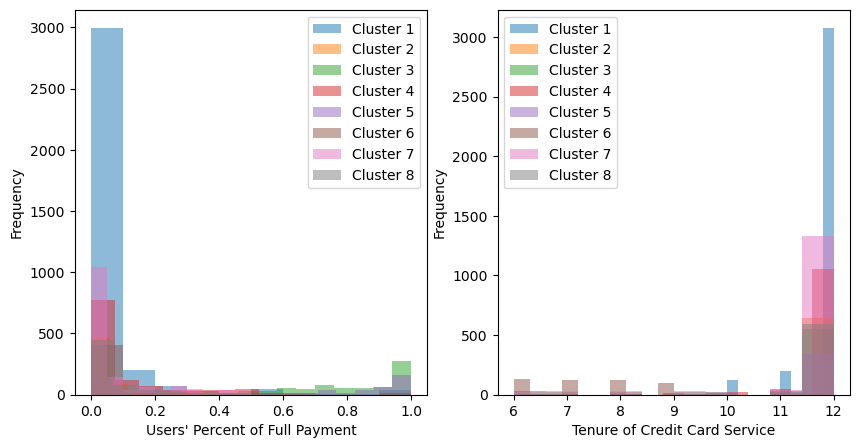

In [14]:
# examine the distribution of users' percent of full payment (variable 17) and tenure of credit card service (variable 18)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for k in range(K_star):
    idx = (labels == k)
    plt.hist(features.loc[idx, "PRC_FULL_PAYMENT"], alpha=0.5, label=f"Cluster {k+1}")
plt.xlabel("Users' Percent of Full Payment")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
for k in range(K_star):
    idx = (labels == k)
    plt.hist(features.loc[idx, "TENURE"], alpha=0.5, label=f"Cluster {k+1}")
plt.xlabel("Tenure of Credit Card Service")
plt.ylabel("Frequency")
plt.legend()

plt.show()

Combination 2: BALANCE, BALANCE FREQUENCY, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CREDIT LIMIT, PRC_FULL_PAYMENT, TENURE

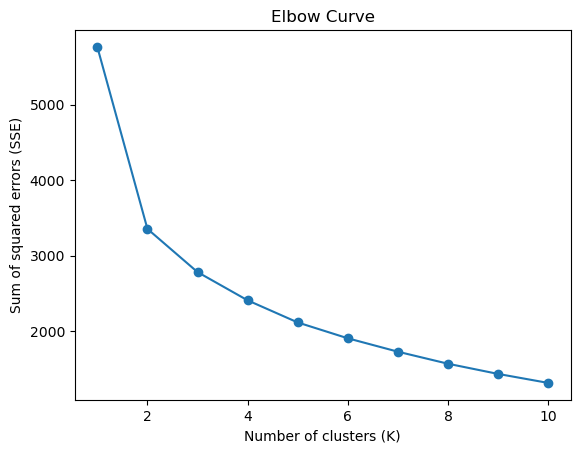

In [15]:
variables = [0,1,6,7,8,9,12,15,16]

# create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler to the data and transform the data
normalized_data = scaler.fit_transform(features.iloc[:, variables])

# initialize list to store sum of squared distances for each value of K
sse = []

# experiment with different number of clusters K using the elbow method
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)

# plot the elbow curve
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Curve')
plt.show() 

In [16]:
# set the optimal number of clusters based on the elbow method
K_star = 8  

# perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters = K_star, random_state = 0)
kmeans.fit(normalized_data)

# assign participants to clusters and compute cluster metrics
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
scatter = np.zeros(K_star)
n_users = np.zeros(K_star)

for k in range(K_star):
    idx = (labels == k)
    n_users[k] = np.sum(idx)
    scatter[k] = np.mean(np.linalg.norm(normalized_data[idx, :] - centroids[k, :], axis=1))

    print(f"Cluster {k+1}:")
    print(f"Number of users: {n_users[k]}")
    print(f"Centroid: {centroids[k]}")
    print(f"Scatter: {scatter[k]:.2f}\n")

Cluster 1:
Number of users: 632.0
Centroid: [0.06931428 0.96450516 0.8447121  0.82590919 0.10675887 0.04788774
 0.19279217 0.30607905 0.96861814]
Scatter: 0.51

Cluster 2:
Number of users: 937.0
Centroid: [0.00764771 0.34493052 0.16271971 0.07168558 0.08696839 0.03166418
 0.13170249 0.22222132 0.96282462]
Scatter: 0.44

Cluster 3:
Number of users: 2705.0
Centroid: [0.12028699 0.97449843 0.06908359 0.05492966 0.01375175 0.15726244
 0.14128811 0.02047953 0.97868145]
Scatter: 0.25

Cluster 4:
Number of users: 1548.0
Centroid: [0.07297811 0.92362296 0.93734276 0.08240526 0.89852265 0.0570137
 0.12302831 0.062994   0.93331179]
Scatter: 0.36

Cluster 5:
Number of users: 482.0
Centroid: [0.07091591 0.76332085 0.1857505  0.11243248 0.06816012 0.18251222
 0.10414276 0.06255268 0.22026279]
Scatter: 0.50

Cluster 6:
Number of users: 787.0
Centroid: [0.0097622  0.91596732 0.88470558 0.19917508 0.8166204  0.00630113
 0.14704738 0.82977324 0.89157137]
Scatter: 0.51

Cluster 7:
Number of users: 1163.

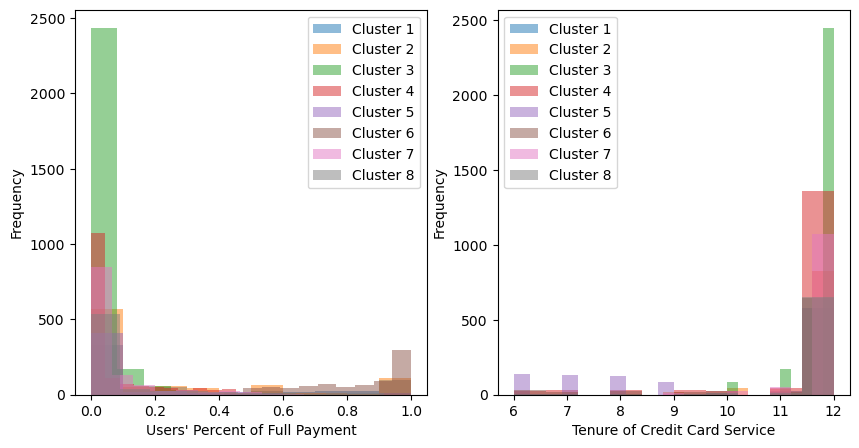

In [17]:
# examine the distribution of users' percent of full payment (variable 17) and tenure of credit card service (variable 18)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for k in range(K_star):
    idx = (labels == k)
    plt.hist(features.loc[idx, "PRC_FULL_PAYMENT"], alpha=0.5, label=f"Cluster {k+1}")
plt.xlabel("Users' Percent of Full Payment")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
for k in range(K_star):
    idx = (labels == k)
    plt.hist(features.loc[idx, "TENURE"], alpha=0.5, label=f"Cluster {k+1}")
plt.xlabel("Tenure of Credit Card Service")
plt.ylabel("Frequency")
plt.legend()

plt.show()

**Discussions**: Combination 1 plus two features (BALANCE, BALANCE FREQUENCY) is Combination 2. 0-10% of users's percent of full payment is more distinguishable in Combination 2 while 12 years of tenure of credit card service is more distinguishable in Combination 1. The average scatter for Combination 1 is 0.375 while that of the Combination 2 is 0.42, which means the average distance of each sample of the cluster to the cluster centroid is smaller for Combination 1. 

## (e) Gaussian mixture models
Use the Gaussian Mixture Models (GMMs) to cluster participants based on the subset of variables that you have identified from question (d). The number of Gaussian mixtures can be approximately equal to the optimal number of clusters K* found by (d). Report the mean vector and covariance matrix for each Gaussian and discuss your findings. Compute the log-likelihood of each sample belonging to the GMM. Plot and discuss the histogram of the resulting log-likelihood values. Note: You can use the sklearn.mixture.GaussianMixture function to conduct the GMM clustering and the sklearn.mixture.score_samples to compute the log-likelihood of each data sample. You can use a heatmap to visualize the covariance matrices of the GMM, instead of printing their actual values.

Gaussian 1:
Mean vector: [6.98624500e-01 2.73654934e-01 5.25981092e-01 0.00000000e+00
 4.50594644e+03 2.92980150e-01 9.31408079e+00]
Covariance matrix:


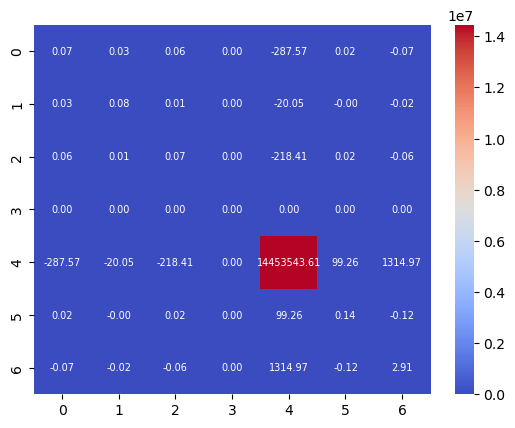

Gaussian 2:
Mean vector: [7.27978422e-01 2.67199388e-01 6.22402647e-01 2.74426410e-01
 5.56330732e+03 2.05488529e-02 1.20000000e+01]
Covariance matrix:


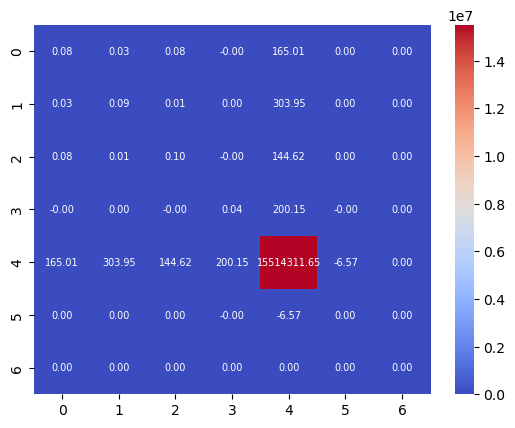

Gaussian 3:
Mean vector: [2.28702081e-01 2.28702081e-01 0.00000000e+00 2.42864621e-01
 4.12309439e+03 2.11881558e-01 1.13184797e+01]
Covariance matrix:


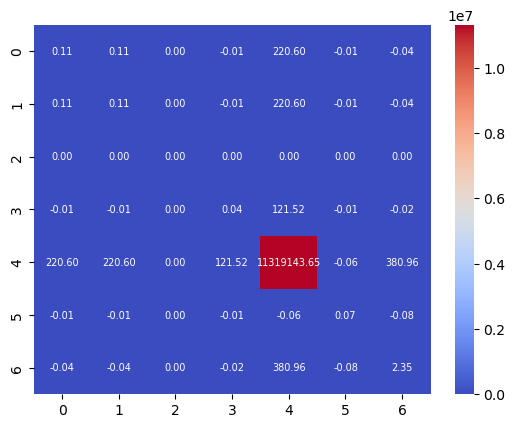

Gaussian 4:
Mean vector: [7.05039581e-02 7.05039581e-02 0.00000000e+00 2.16208243e-01
 4.14065801e+03 0.00000000e+00 1.13335339e+01]
Covariance matrix:


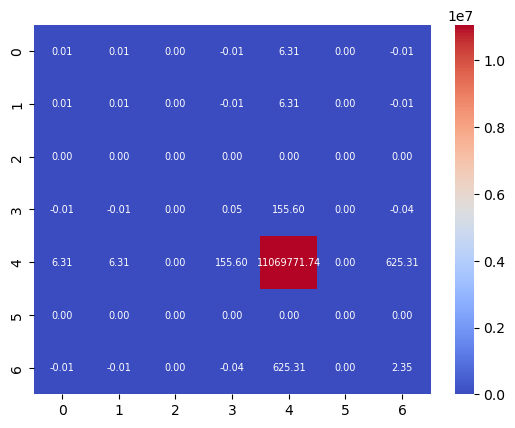

Gaussian 5:
Mean vector: [7.79665375e-01 3.91385004e-01 5.94331972e-01 3.29963770e-01
 5.60785029e+03 2.33664607e-01 9.97991017e+00]
Covariance matrix:


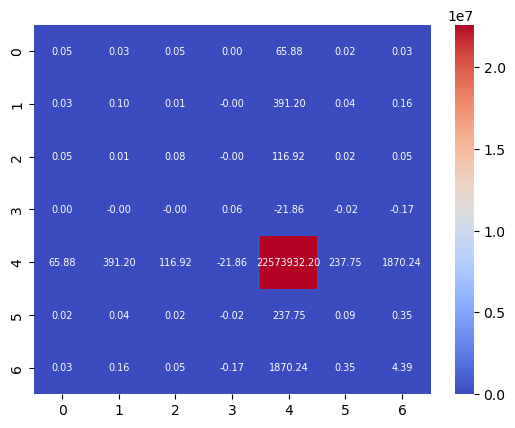

Gaussian 6:
Mean vector: [7.88012931e-01 4.99103316e-01 5.36855856e-01 0.00000000e+00
 5.85105426e+03 2.76431000e-01 1.20000000e+01]
Covariance matrix:


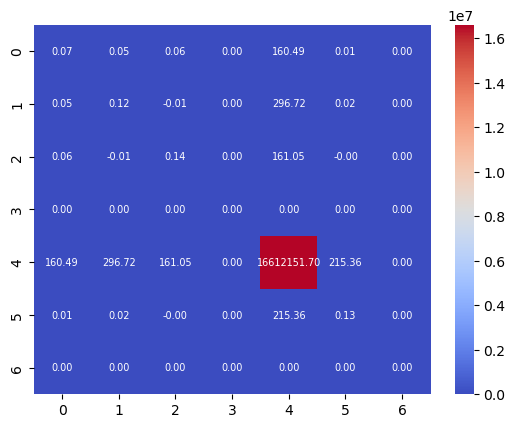

Gaussian 7:
Mean vector: [6.95836373e-01 0.00000000e+00 6.75003756e-01 0.00000000e+00
 3.15509679e+03 2.84650141e-01 1.20000000e+01]
Covariance matrix:


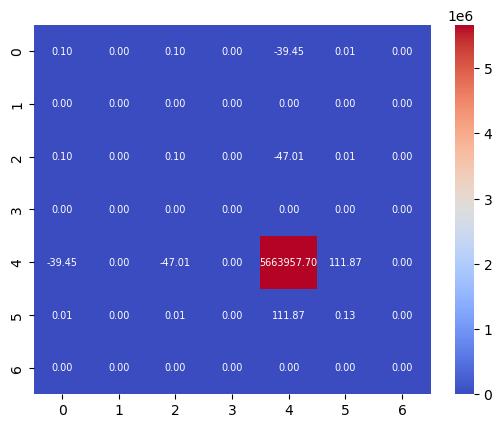

Gaussian 8:
Mean vector: [7.92778856e-01 0.00000000e+00 6.93221760e-01 5.37633438e-02
 1.54746753e+03 3.55037366e-01 8.78944996e+00]
Covariance matrix:


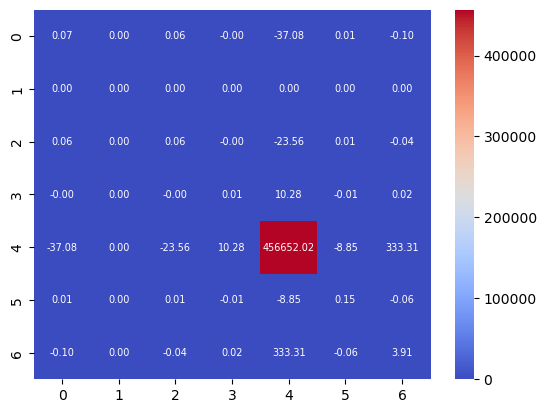

In [34]:
variables = [6,7,8,9,12,15,16]

# Extract the subset of variables for GMM clustering
X_subset = features.iloc[:, variables]

# Set the number of Gaussian mixtures
n_components = 8

# Create and fit the GMM object
gmm = GaussianMixture(n_components = n_components, covariance_type='full', random_state=42)
gmm.fit(X_subset)

# Extract the mean vectors and covariance matrices for each Gaussian
means = gmm.means_
covs = gmm.covariances_


# Print the mean vectors and covariance matrices for each Gaussian
for k in range(n_components):
    print(f"Gaussian {k+1}:")
    print(f"Mean vector: {means[k]}")
    print(f"Covariance matrix:")
    #fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(covs[k], cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'fontsize': 7})
    plt.show()

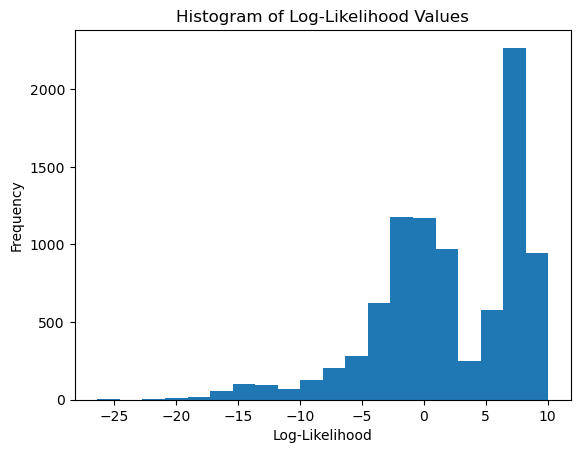

In [35]:
# Compute the log-likelihood of each sample belonging to the GMM
log_likelihoods = gmm.score_samples(X_subset)

# Plot the histogram of log-likelihood values
plt.hist(log_likelihoods, bins=20)
plt.title("Histogram of Log-Likelihood Values")
plt.xlabel("Log-Likelihood")
plt.ylabel("Frequency")
plt.show()

**Discussions**: 

**The mean vector** is the average values of each feature for the data points assigned to that component. It indicates the center of the distribution in the feature space. The means of all two Gaussian component combinations are not the same which means the 8 clusters have different characteristics. 

**The covariance matrix** defines the shape of this curve. It indicates the correlations between the different features and how they contribute to the overall shape of the distribution. A diagonal covariance matrix indicates that the features are uncorrelated, while a non-diagonal matrix indicates that they are correlated. A large variance in a feature indicates that it has a strong influence on the shape and orientation of the distribution along that dimension. From the plot, the covariance matrices are different between two components indicating that they have different levels of variability or correlations between their features.

**A histogram of the log-likelihood** values can help to assess the quality of the GMM fit to the data. Ideally, the histogram should be approximately normally distributed, centered around a high log-likelihood value. This would indicate that the GMM is a good fit to the data and that the majority of data points are well-modeled by the mixture of Gaussians. However, if the histogram is not normally distributed, it indicates that the GMM is not a good fit to the data. For example, if the histogram is skewed to the left or has a bimodal shape, it may indicate that the GMM is not capturing all the relevant patterns in the data. Additionally, if the histogram has a large spread or high variability in the log-likelihood values, it may indicate that the GMM is overfitting or underfitting the data. From the histogram above, it has a bimodal shape, so the GMM is not a good fit to the data and may needs improvements or modifications to better capture the underlying patterns in the data.



---
